In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
# import dataframe_image as dfi
from sklearn.metrics import mean_squared_error

# The Dataset

Describe the dataset and the source: https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation#

In [2]:
data = pd.read_csv('./Occupancy_Estimation.csv')
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
data.shape

(10129, 19)

# Data Cleaning

In [4]:
# let's check for nulls
data.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [5]:
# let's check that the columns are appropriately typed
data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [6]:
# convert date and time fields to pandas datetime object
data.insert(2, 'datetime', pd.to_datetime(data['Date'] + ' ' + data['Time']))
data = data.iloc[:, 2:]
data.head()


,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [7]:
data.dtypes

datetime                datetime64[ns]
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
dtype: object

# Data Exploration

In [8]:
data.apply([np.mean, np.std, min, max])

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
mean,2017-12-27 20:27:23.034554112,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,7 days 05:02:05.971942454,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,2017-12-22 10:49:41,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
max,2018-01-11 09:00:09,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [9]:
data.shape

(10129, 18)

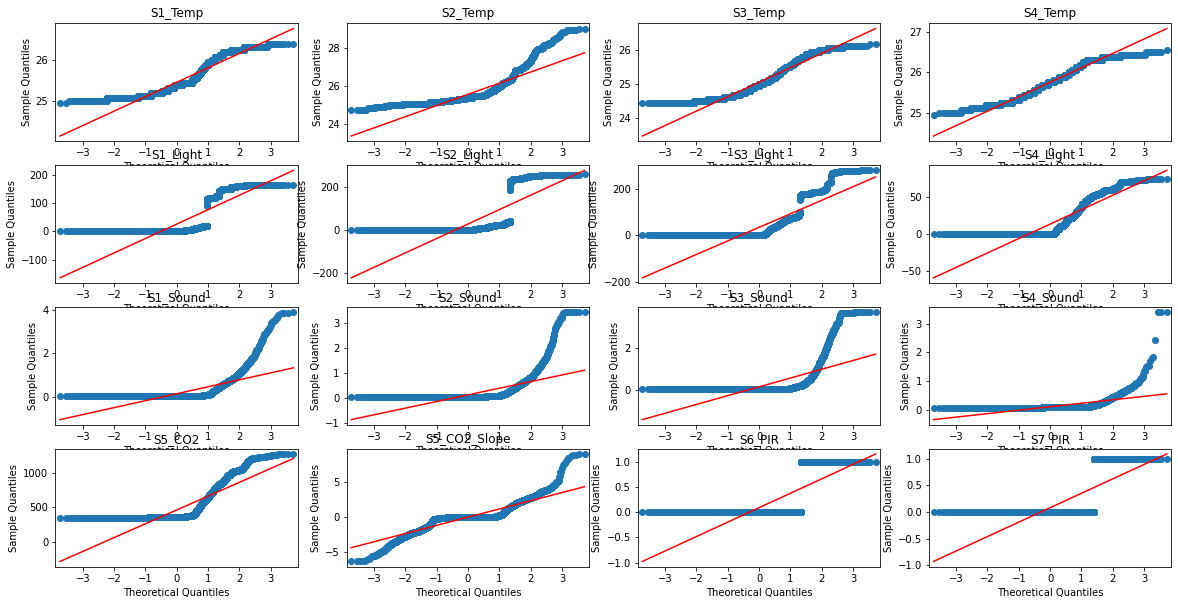

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(20, 10))
ax = ax.flatten()
for i in range(1, 17):
    sm.qqplot(data.iloc[:, i], line='s', ax=ax[i - 1])
    ax[i - 1].set_title(data.columns[i])

In [11]:
for i in data.columns[9:]:
    print(data[i].value_counts())

0.07    3833
0.08    3501
0.06     779
0.09     244
0.10      92
        ... 
2.79       1
2.49       1
3.51       1
2.59       1
3.16       1
Name: S1_Sound, Length: 231, dtype: int64
0.05    5809
0.04    1426
0.06    1047
0.07     144
0.08      89
        ... 
2.12       1
1.78       1
3.13       1
2.25       1
2.54       1
Name: S2_Sound, Length: 185, dtype: int64
0.06    5499
0.05    1398
0.07    1380
0.08     181
0.09      97
        ... 
2.92       1
1.24       1
2.34       1
0.79       1
2.24       1
Name: S3_Sound, Length: 258, dtype: int64
0.06    2878
0.10    1914
0.09    1663
0.08     991
0.07     869
        ... 
1.36       1
1.35       1
1.84       1
0.87       1
1.80       1
Name: S4_Sound, Length: 106, dtype: int64
355     2550
360     1391
345     1179
350      714
365      438
        ... 
1235       1
1090       1
1145       1
1130       1
1260       1
Name: S5_CO2, Length: 186, dtype: int64
 0.000000    4495
-0.046154      84
-0.042308      63
-0.034615      53
-0.03

# Research Question

How does PCA affect the accuracy of various regression models when predicting the occupancy of a room? Which regression model is the best predictor of room occupancy?

# Data Preprocessing

In [12]:
# We saw above that we have very skewed data and individual features have very different ranges. For these reasons, we will first need to scale our data using a Standard Scaler from the sklearn library.
scaler = StandardScaler()
data[data.columns[1:-1]] = scaler.fit_transform(data[data.columns[1:-1]])
data.head()

,datetime,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22 10:49:41,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029,1
1,2017-12-22 10:50:12,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029,1
2,2017-12-22 10:50:42,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029,1
3,2017-12-22 10:51:13,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029,1
4,2017-12-22 10:51:44,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029,1


In [35]:
data.apply([np.mean, np.std, min, max])

[0311/202626.697864:INFO:headless_shell.cc(659)] Written to file /var/folders/wn/1pqs9zvs4d7306tpghptydnc0000gn/T/tmpei17fo0z/temp.png.
[0311/202627.817644:INFO:headless_shell.cc(659)] Written to file /var/folders/wn/1pqs9zvs4d7306tpghptydnc0000gn/T/tmpkham17gg/temp.png.


In [14]:
# the datetime variable is not relevant to our analysis here, so we will drop it
data = data.iloc[:, 1:]

# Data Partitioning

We want to use a 70-20-10 split for our training, validation, and test data, respectively.

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:, -1], train_size=0.7, random_state=42)
Xvalid, Xtest, yvalid, ytest = train_test_split(Xtest, ytest, train_size=(2/3), random_state=42)

In [16]:
Xtrain.shape

(7090, 16)

In [17]:
ytrain.shape

(7090,)

In [18]:
Xvalid.shape

(2026, 16)

In [19]:
yvalid.shape

(2026,)

In [20]:
Xtest.shape

(1013, 16)

In [21]:
ytest.shape

(1013,)

# Model Construction

## Linear Regression (without PCA)

In [22]:
ols = LinearRegression()
ols = ols.fit(Xtrain, ytrain)
ols.score(Xtrain, ytrain)

0.8961623013847336

In [37]:
mean_squared_error(ytrain, ols.predict(Xtrain), squared=False)

0.2887501080821804

## Linear Regression (with PCA)

In [23]:
pipe = Pipeline([('pca', PCA()), ('ols', ols)])
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA()), ('ols', LinearRegression())],
 'verbose': False,
 'pca': PCA(),
 'ols': LinearRegression(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'ols__copy_X': True,
 'ols__fit_intercept': True,
 'ols__n_jobs': None,
 'ols__normalize': 'deprecated',
 'ols__positive': False}

In [24]:
params = {'pca__n_components': range(2, 10)}
grid = GridSearchCV(estimator=pipe, param_grid=params, cv=8)
grid = grid.fit(Xtrain, ytrain)
grid.best_params_

{'pca__n_components': 9}

In [25]:
grid.score(Xtrain, ytrain)

0.877854047906335

In [38]:
mean_squared_error(ytrain, grid.predict(Xtrain), squared=False)

0.3131728956679437

## Decision Tree (without PCA)

In [42]:
tree = DecisionTreeRegressor()
tree = tree.fit(Xtrain, ytrain)
tree.score(Xtrain, ytrain)

1.0

In [46]:
mean_squared_error(ytrain, tree.predict(Xtrain), squared=False)

0.0

## Decision Tree (with PCA)

In [43]:
pipe2 = Pipeline([('pca', PCA()), ('tree', tree)])
pipe2.get_params()

{'memory': None,
 'steps': [('pca', PCA()), ('tree', DecisionTreeRegressor())],
 'verbose': False,
 'pca': PCA(),
 'tree': DecisionTreeRegressor(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'tree__ccp_alpha': 0.0,
 'tree__criterion': 'squared_error',
 'tree__max_depth': None,
 'tree__max_features': None,
 'tree__max_leaf_nodes': None,
 'tree__min_impurity_decrease': 0.0,
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2,
 'tree__min_weight_fraction_leaf': 0.0,
 'tree__random_state': None,
 'tree__splitter': 'best'}

In [44]:
grid2 = GridSearchCV(estimator=pipe2, param_grid=params, cv=8)
grid2 = grid2.fit(Xtrain, ytrain)
grid2.best_params_

{'pca__n_components': 4}

In [45]:
grid2.score(Xtrain, ytrain)

1.0

In [47]:
mean_squared_error(ytrain, grid2.predict(Xtrain), squared=False)

0.0

# Model Selection

In [30]:
# normal linear regression on validation set
ols.score(Xvalid, yvalid)

0.8766230997717136

In [39]:
mean_squared_error(yvalid, ols.predict(Xvalid), squared=False)

0.31313065676320684

In [31]:
# linear regression with PCA on validation set
grid.score(Xvalid, yvalid)

0.855279525338601

In [40]:
mean_squared_error(yvalid, grid.predict(Xvalid), squared=False)

0.33913581040401103

In [32]:
# normal decision tree on validation set
tree.score(Xvalid, yvalid)

0.9975320829220138

In [48]:
mean_squared_error(yvalid, tree.predict(Xvalid), squared=False)

0.1276254391362035

In [33]:
# decision tree with PCA on validation set
grid2.score(Xvalid, yvalid)

0.9664363277393879

In [49]:
mean_squared_error(yvalid, grid2.predict(Xvalid), squared=False)

0.2628719805981859

Evaluate your final (selected) model using the test dataset to understand how well your
model generalizes to new examples or input data